In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18
plt.rcParams['text.usetex'] = True
from unicirc import rank_test, ansatz_specs

In [ ]:
num_samples = 10
key = 15625
tol = None

ns = [3, 4, 5, 6]
ns = [3, 4, 5]

for n in ns:
    print(f"Testing universality via rank test for {n} qubits,")
    for group in ["SO", "Sp", "SU"]:
        print(f"    for {group}({2**n})")
        rank_test(n, group, num_samples, key, tol)
    

Testing universality via rank test for 3 qubits,
    for SO(8)


  0%|          | 0/10 [00:00<?, ?it/s]

    for Sp(8)


  0%|          | 0/10 [00:00<?, ?it/s]

    for SU(8)


  0%|          | 0/10 [00:00<?, ?it/s]

Testing universality via rank test for 4 qubits,
    for SO(16)


  0%|          | 0/10 [00:00<?, ?it/s]

    for Sp(16)


  0%|          | 0/10 [00:00<?, ?it/s]

    for SU(16)


  0%|          | 0/10 [00:00<?, ?it/s]

Testing universality via rank test for 5 qubits,
    for SO(32)


  0%|          | 0/10 [00:00<?, ?it/s]

    for Sp(32)


  0%|          | 0/10 [00:00<?, ?it/s]

    for SU(32)


  0%|          | 0/10 [00:00<?, ?it/s]

Testing universality via rank test for 6 qubits,
    for SO(64)


  0%|          | 0/10 [00:00<?, ?it/s]

Text(0.5, 0, '$n$')

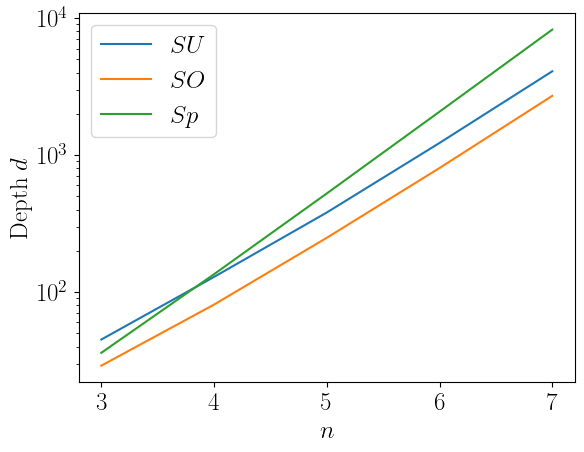

In [3]:
def depth(n, group):
    """Estimated depth of a universal circuit for a given group and qubit count.
    Will overestimate the depth by a bit."""
    dim, *_, num_cz, _ = ansatz_specs(n, group)
    if group == "SU":
        d = 3 + (int(np.ceil(num_cz / (n-1)))) * 6
    elif group == "SO":
        d = 1 + (int(np.ceil(num_cz / (n-1)))) * 4
    elif group == "Sp":
        d = 3 + num_cz * 3

    return d

fig, ax = plt.subplots(1, 1)
for group in ["SU", "SO", "Sp"]:
    ns = np.arange(3, 8)
    d = [depth(n, group) for n in ns]
    ax.plot(ns, d, label=f"${group}$")
ax.legend()
ax.set_yscale("log")
ax.set_ylabel("Estimated depth $d$")
ax.set_xlabel("$n$")
    

In [3]:
import pennylane as qml
import jax
from functools import partial
from unicirc import jac_rank

def make_ppr_ansatz(paulis):

    n = len(paulis[0])
    wires = range(n)
    
    @jax.jit
    @partial(qml.matrix, wire_order=wires)
    def mat_fn(params):
        [qml.PauliRot(param, pauli, wires=wires) for param, pauli in zip(params, paulis, strict=True)]

    mat_jac_fn = jax.jit(jax.jacobian(mat_fn, holomorphic=True))
    return mat_fn, mat_jac_fn
    

In [4]:
from itertools import product

n = 4
in_sequence = ["".join(tup) for tup in product("IXYZ", repeat=n)][1:]

mat_fn, mat_jac_fn = make_ppr_ansatz(in_sequence)

In [24]:
from jax import numpy as jnp
params = jnp.array(np.random.random(4**n-1), dtype=jnp.complex128)*0.6
# params = jnp.array(np.zeros(4**n-1), dtype=jnp.complex128)
jac_rank(mat_jac_fn, params, tol=1e-8)
# fn = jax.jit(lambda params: jac_rank(mat_jac_fn, params, tol=1e-8)[0])

In [36]:
from tqdm.auto import tqdm
reps = 10
tols = [1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
ranks = {}
for tol in tqdm(tols):
    ranks[tol] = {}
    scales = np.linspace(0, 2, num=21, endpoint=True)
    for scale in tqdm(scales, total=len(scales)):
        ranks[tol][scale] = [jac_rank(mat_jac_fn, jnp.array(np.random.random(4**n-1), dtype=jnp.complex128)*scale, tol=tol) for _ in tqdm(range(reps), total=reps)]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

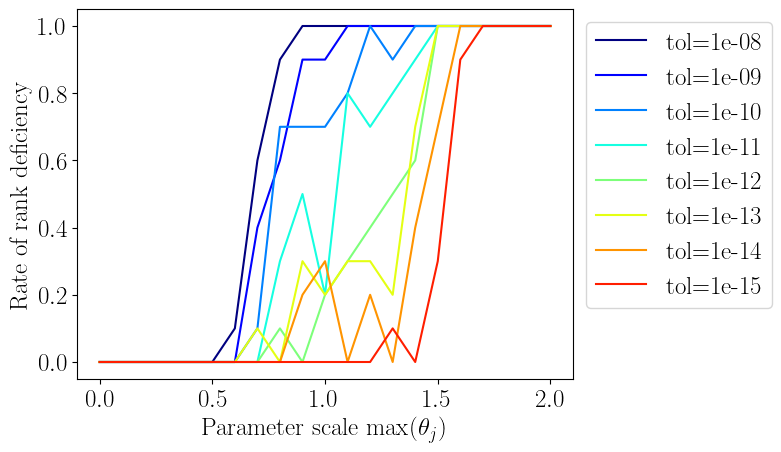

In [44]:
fig, ax = plt.subplots(1, 1)
cm = plt.get_cmap('jet')
colors = [cm(i/len(tols)) for i in range(len(tols))]

for tol, col in zip(tols, colors):
    deficiency_rate = [sum([rk<(4**n-1) for rk, _ in ranks[tol][scale]])/len(ranks[tol][scale]) for scale in scales]
    ax.plot(
        scales,
        deficiency_rate,
        label=f"{tol=}",
        c=col,
    )
ax.set_xlabel(r"Parameter scale $\max(\theta_j)$")
ax.set_ylabel(r"Rate of rank deficiency")
ax.legend(bbox_to_anchor=(1., 1.), loc="upper left")
# for scale in scales:
#     print(ranks[scale])